In [30]:
import timeit
from matplotlib import pyplot as plt
from kmerge_dyc import kmerge as kmerge_dyc
from kmerge_heap import kmerge as kmerge_heap
from utils import random_sorted_array
import seaborn as sns

sns.set(rc={'figure.facecolor':'white'})
CASES = 100

In [31]:
def get_time(kmerge, case):
    number_of_executions, total_time = timeit.Timer(lambda: kmerge(*case)).autorange()
    return total_time / number_of_executions


def plot(kmerge, label, cases, case_multiplier):
    time_to_run = [get_time(kmerge, case) for case in cases]
    plt.plot([i*case_multiplier for i in range(len(cases))], time_to_run, label=label)
    return plt


def plot_comparison(cases, case_multiplier, title, xlabel):
    plot(kmerge_dyc, 'Divide y conquista', cases, case_multiplier)
    plot(kmerge_heap, 'Heaps', cases, case_multiplier)
    plt.xlabel(xlabel)
    plt.ylabel("Tiempo de ejecucion (s)")
    plt.title(title)
    plt.legend()
    plt.show()

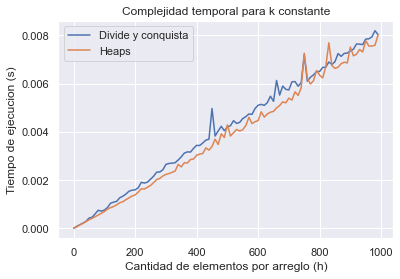

In [36]:
k = 10
case_multiplier = 10
cases_k_constant = [[random_sorted_array(i * case_multiplier) for _ in range(k)] for i in range(CASES)]
plot_comparison(cases_k_constant, case_multiplier, "Complejidad temporal para k constante" ,"Cantidad de elementos por arreglo (h)")

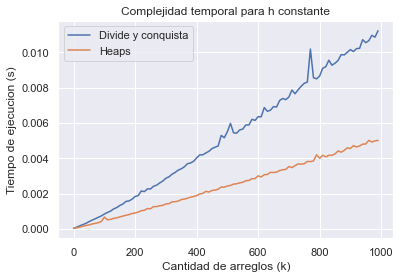

In [ ]:
h = 5
case_multiplier = 10
cases_h_constant = [[random_sorted_array(h) for _ in range((i+1)*case_multiplier)] for i in range(CASES)]
plot_comparison(cases_h_constant, case_multiplier, "Complejidad temporal para h constante" ,"Cantidad de arreglos (k)")